<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Time Series Independent Practice

In [15]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
from dateutil.relativedelta import *
%matplotlib inline

plt.rcParams['figure.figsize'] = [10, 6]
plt.rcParams['font.size'] = 14
plt.style.use('fivethirtyeight')

## Walmart Sales Data

For this independent practice, we'll analyze Walmart's weekly sales data over a two-year period from 2010 to 2012.

The data set is again separated by store and department, but we'll focus on analyzing one store for simplicity.

The data include:

* `Store`: The store number.
* `Dept`: The department number.
* `Date`: The week.
* `Weekly_Sales`: Sales for the given department in the given store.
* `IsHoliday`: Whether the week is a special holiday week.

### 1) Preprocess the data using Pandas.

* **Load the data.**
* **Convert the `Date` column to a `datetime` object.**
* **Set `Date` as the index of the DataFrame.**

In [3]:
walmart = pd.read_csv('../data/train.csv')

In [4]:
walmart.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False


In [5]:
walmart.dtypes

Store             int64
Dept              int64
Date             object
Weekly_Sales    float64
IsHoliday          bool
dtype: object

In [6]:
walmart['Date'] = pd.to_datetime(walmart['Date'])

In [7]:
walmart.dtypes

Store                    int64
Dept                     int64
Date            datetime64[ns]
Weekly_Sales           float64
IsHoliday                 bool
dtype: object

In [8]:
walmart.set_index('Date', inplace=True)

In [9]:
walmart.head()

,Store,Dept,Weekly_Sales,IsHoliday
Date,,,,
2010-02-05,1,1,24924.50,False
2010-02-12,1,1,46039.49,True
2010-02-19,1,1,41595.55,False
2010-02-26,1,1,19403.54,False
2010-03-05,1,1,21827.90,False


### Filter the DataFrame to Store 1 sales and aggregate over departments to compute the total weekly sales per store. Store this in a new DataFrame.

In [11]:
store1 = walmart[walmart.Store == 1][['Weekly_Sales']].resample('W').sum()

In [12]:
store1.head()

,Weekly_Sales
Date,
2010-02-07,1643690.90
2010-02-14,1641957.44
2010-02-21,1611968.17
2010-02-28,1409727.59
2010-03-07,1554806.68


### Plot the rolling mean for `Weekly_Sales`. What general trends do you observe?

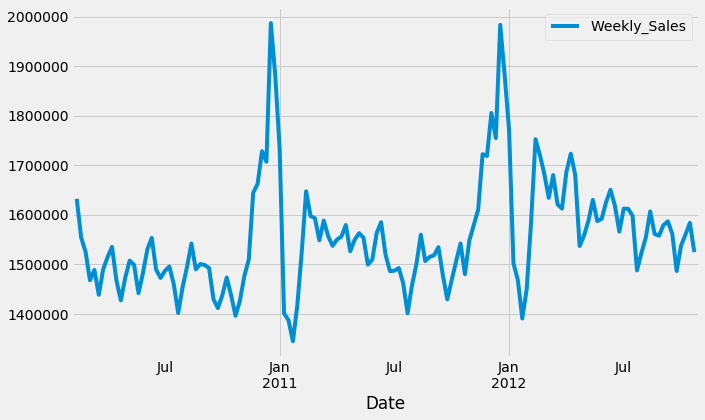

In [16]:
store1[['Weekly_Sales']].rolling(window = 3, center = True).mean().plot();

### Compute the `1`, `13`, and `52` autocorrelations for `Weekly_Sales` and/or create an autocorrelation plot.

In [17]:
print('Autocorrelation 1: ', store1['Weekly_Sales'].autocorr(1))
print('Autocorrelation 13: ', store1['Weekly_Sales'].autocorr(13))
print('Autocorrelation 52: ', store1['Weekly_Sales'].autocorr(52))

Autocorrelation 1:  0.3021582794113126
Autocorrelation 13:  0.10169228501987718
Autocorrelation 52:  0.895376029477701


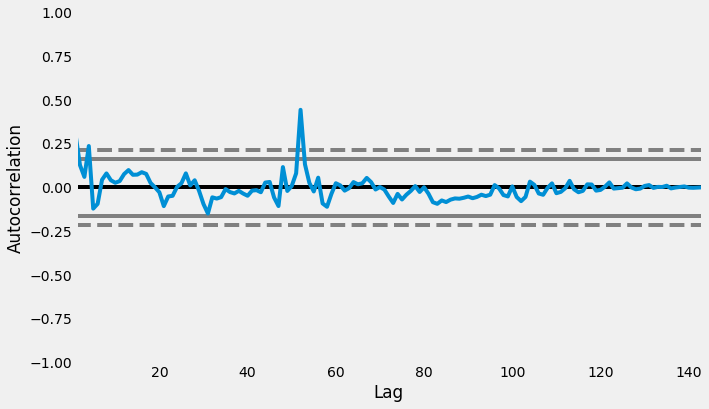

In [22]:
from pandas.plotting import autocorrelation_plot

autocorrelation_plot(store1['Weekly_Sales']);

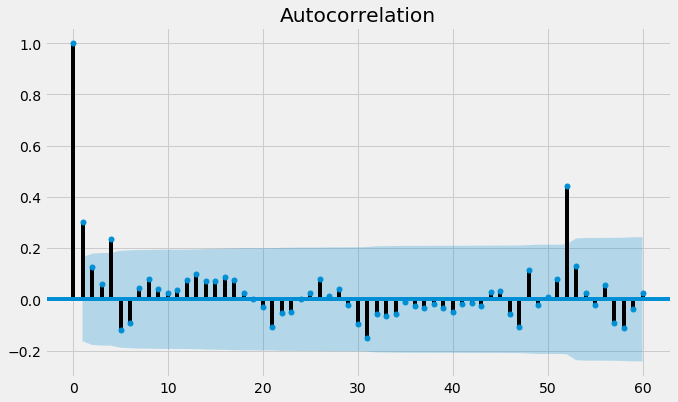

In [21]:
from statsmodels.graphics.tsaplots import plot_acf

plot_acf(store1['Weekly_Sales'], lags=60);

### Create a decomposition plot for the Store 1 sales data. 

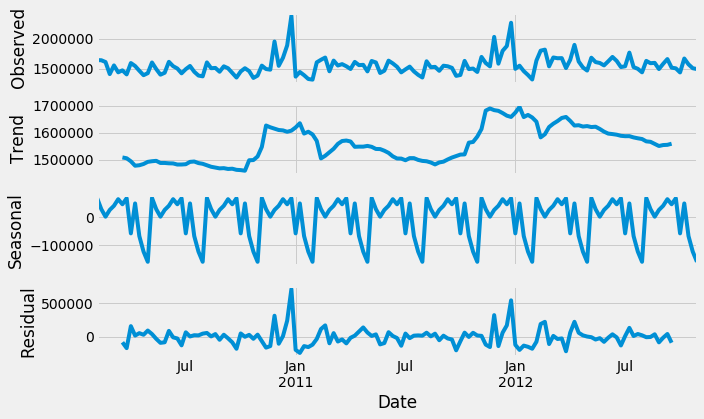

In [26]:
from statsmodels.tsa.seasonal import seasonal_decompose

decomposition = seasonal_decompose(store1.Weekly_Sales, freq=13)   
fig = decomposition.plot();

### Based on the analyses above, what can we deduce about this time series?

* Big autocorrelation spikes are happening around 52, indicating some kind of yearly pattern.
* Autocorrelation is high at 1 and 2 lags (perhaps even up to 4), so it's most likely useful for an autoregressive model.
* There are no random spikes, so there's probably not much use for a moving average model.